## Deep Learning

Introdução


In [0]:
from matplotlib import pyplot

- Regressão logística
- Loss function
- Derivadas
  - 1/m * (np.sum(dz))
- Gradiente descendente
- Funções de ativação
  - ReLU, Leaky ReLU
  - Tanh
  - Sigmóide
  

Exercícios

- Playground: Redes neurais com [TensorFlow](https://developers.google.com/machine-learning/crash-course/introduction-to-neural-networks/playground-exercises)

- [Intro](https://colab.research.google.com/notebooks/mlcc/intro_to_neural_nets.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=introneuralnets-colab&hl=pt) neural networks

- [Planar data classification](https://github.com/Kulbear/deep-learning-coursera/blob/master/Neural%20Networks%20and%20Deep%20Learning/Planar%20data%20classification%20with%20one%20hidden%20layer.ipynb)

Links úteis:

- [DL course](https://tensorchiefs.github.io/dl_course/)

**ReLU function**

In [0]:
# rectified linear function
def rectified(x):
	return max(0.0, x)

In [0]:
# define a series of inputs
series_in = [x for x in range(-10, 11)]
# calculate outputs for our inputs
series_out = [rectified(x) for x in series_in]

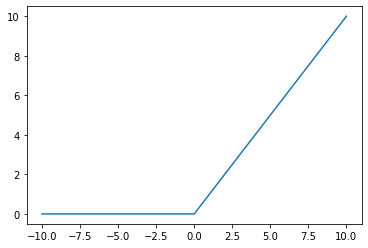

In [3]:
# line plot of raw inputs to rectified outputs
pyplot.plot(series_in, series_out)
pyplot.show()

**Regressão logística**

In [0]:
import numpy as np    
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
x1 = np.random.randn(100)
x2 = np.random.randn(100)
x3 = np.random.randn(100)

#Make difference in feature dependance
y = (3 + x1 + 2*x2 + 5*x3 + 0.2*np.random.randn()) > 0

X = pd.DataFrame({'x1':x1,'x2':x2,'x3':x3})

In [20]:
#Scale your data
scaler = StandardScaler()
scaler.fit(X) 
X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)

clf = LogisticRegression(random_state = 0)
clf.fit(X_scaled, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

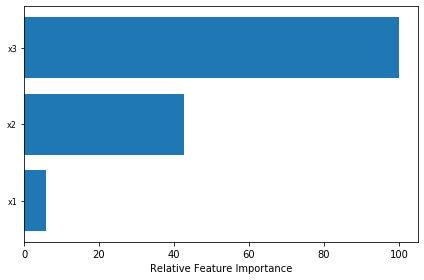

In [25]:
feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()